In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from CSV
df_2015 = pd.read_csv("/content/drive/MyDrive/projects/archive/2015.csv")

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df_2015.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

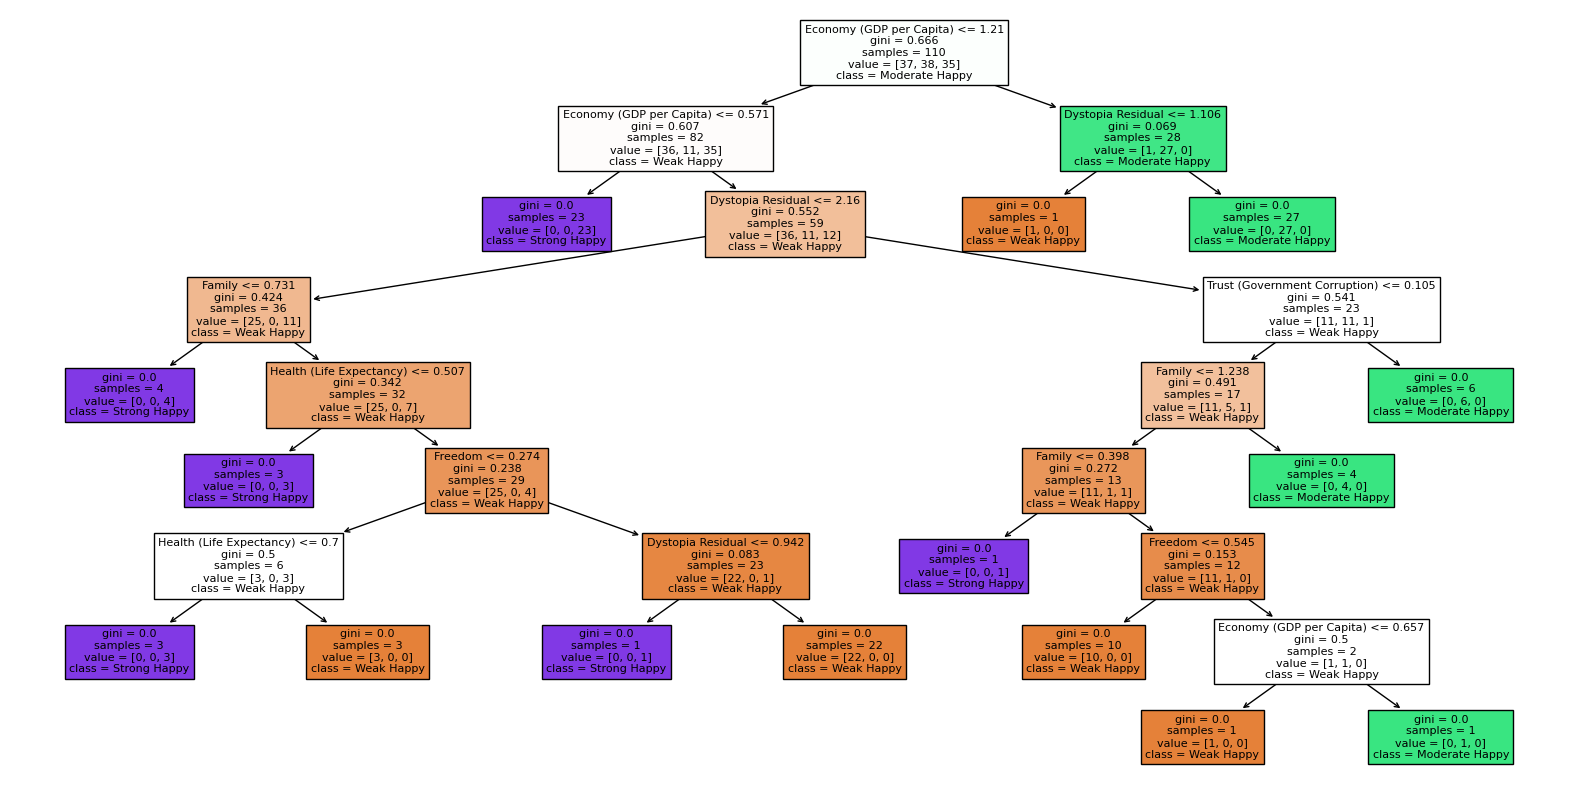

                precision    recall  f1-score   support

    Weak Happy       0.58      0.47      0.52        15
Moderate Happy       0.79      0.73      0.76        15
  Strong Happy       0.77      0.94      0.85        18

      accuracy                           0.73        48
     macro avg       0.71      0.71      0.71        48
  weighted avg       0.72      0.73      0.72        48

Example of a correctly classified test data point:
Features: Economy (GDP per Capita)         0.27108
Family                           0.70905
Health (Life Expectancy)         0.48246
Freedom                          0.44017
Trust (Government Corruption)    0.19034
Generosity                       0.79588
Dystopia Residual                1.41805
Name: 128, dtype: float64
Actual: 2, Predicted: 2

Example of an incorrectly classified test data point:
Features: Economy (GDP per Capita)         0.18847
Family                           0.95152
Health (Life Expectancy)         0.43873
Freedom            

In [ ]:
# Step 1: Create 'Happiness Category' based on 'Happiness Score'
df_2015['Happiness Category'] = pd.qcut(df_2015['Happiness Score'], 3, labels=['Weak Happy', 'Moderate Happy', 'Strong Happy'])

# Step 2: Categorize attributes with safe_qcut function
def safe_qcut(x, n_quantiles, labels):
    try:
        return pd.qcut(x, n_quantiles, labels=labels, duplicates='drop')
    except ValueError as e:
        print(f"Error with qcut for {x.name}: {e}")
        # Fallback or alternative handling can go here
        return pd.cut(x, bins=n_quantiles, labels=labels, right=True)

attributes = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
for attribute in attributes:
    df_2015[f'{attribute} Category'] = safe_qcut(df_2015[attribute], 3, labels=['Low', 'Medium', 'High'])

# Step 3: Prepare the data for modeling
features = attributes  # Using original attributes for demonstration
X = df_2015[features]
y = df_2015['Happiness Category']
y_encoded = LabelEncoder().fit_transform(y)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Step 5: Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5.1: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
plt.show()

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
print(report)

# Additional Steps: Find correctly and incorrectly classified examples
correct_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual == predicted]
incorrect_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted]

# Display an example of correct classification
if correct_indices:
    print("Example of a correctly classified test data point:")
    correct_index = correct_indices[0]  # Taking the first correct example
    print(f"Features: {X_test.iloc[correct_index]}")
    print(f"Actual: {y_test[correct_index]}, Predicted: {y_pred[correct_index]}")

# Display an example of incorrect classification
if incorrect_indices:
    print("\nExample of an incorrectly classified test data point:")
    incorrect_index = incorrect_indices[0]  # Taking the first incorrect example
    print(f"Features: {X_test.iloc[incorrect_index]}")
    print(f"Actual: {y_test[incorrect_index]}, Predicted: {y_pred[incorrect_index]}")

In [ ]:
# Load the dataset from CSV
df_2018 = pd.read_csv("/content/drive/MyDrive/projects/archive/2018.csv")

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df_2018.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


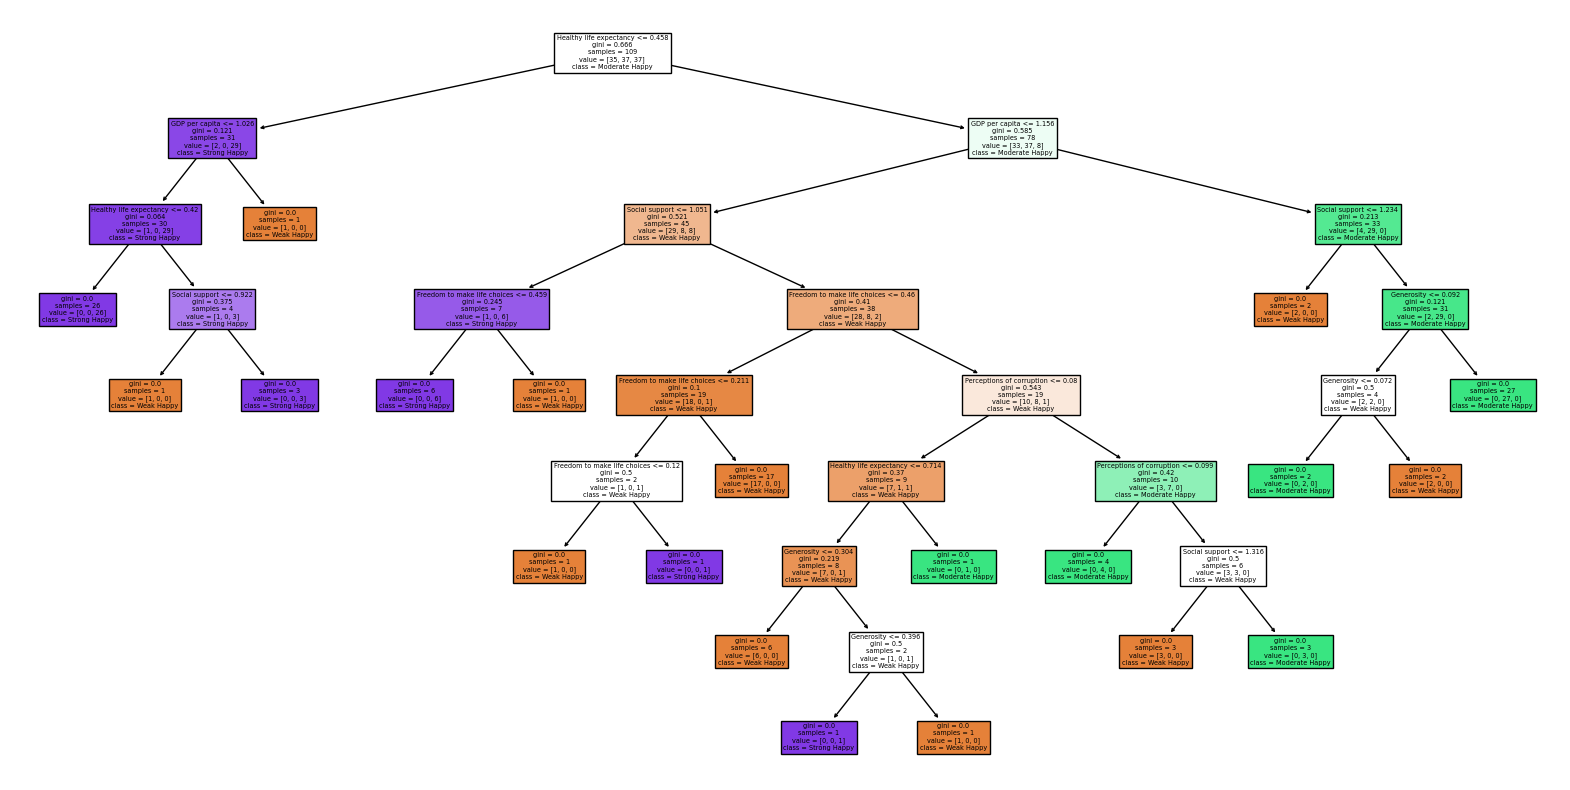

                precision    recall  f1-score   support

    Weak Happy       0.50      0.35      0.41        17
Moderate Happy       0.62      0.67      0.65        15
  Strong Happy       0.68      0.87      0.76        15

      accuracy                           0.62        47
     macro avg       0.60      0.63      0.61        47
  weighted avg       0.60      0.62      0.60        47

Example of a correctly classified test data point:
Features: GDP per capita                  0.715
Social support                  1.365
Healthy life expectancy         0.702
Freedom to make life choices    0.618
Generosity                      0.177
Perceptions of corruption       0.079
Name: 94, dtype: float64
Actual: 0, Predicted: 0

Example of an incorrectly classified test data point:
Features: GDP per capita                  0.796
Social support                  1.335
Healthy life expectancy         0.527
Freedom to make life choices    0.541
Generosity                      0.364
Perceptions 

In [ ]:
# Step 1: Categorize countries based on Score into three groups
df_2018['Happiness Category'] = pd.qcut(df_2018['Score'], 3, labels=['Weak Happy', 'Moderate Happy', 'Strong Happy'])

# Step 2: Categorize relevant attributes into three categories
attributes = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for attribute in attributes:
    # Handling missing values in 'Perceptions of corruption' by filling them with the median
    df_2018[attribute] = df_2018[attribute].fillna(df_2018[attribute].median())
    df_2018[f'{attribute} Category'] = pd.qcut(df_2018[attribute], 3, labels=['Low', 'Medium', 'High'])

# Step 3: Prepare the data for modeling
X = df_2018[attributes]
y = df_2018['Happiness Category']
y_encoded = LabelEncoder().fit_transform(y)

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Step 5: Train the Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5.1: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=attributes, class_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
plt.show()

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
print(report)

# Additional Steps: Identify correctly and incorrectly classified examples
correct_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual == predicted]
incorrect_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted]

# Display an example of correct classification
if correct_indices:
    correct_index = correct_indices[0]  # Taking the first correct example
    print("Example of a correctly classified test data point:")
    print(f"Features: {X_test.iloc[correct_index]}")
    print(f"Actual: {y_test[correct_index]}, Predicted: {y_pred[correct_index]}")

# Display an example of incorrect classification
if incorrect_indices:
    incorrect_index = incorrect_indices[0]  # Taking the first incorrect example
    print("\nExample of an incorrectly classified test data point:")
    print(f"Features: {X_test.iloc[incorrect_index]}")
    print(f"Actual: {y_test[incorrect_index]}, Predicted: {y_pred[incorrect_index]}")

In [ ]:
# Load the dataset from CSV
df_2020 = pd.read_csv("/content/drive/MyDrive/projects/archive/2020.csv")

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df_2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

                precision    recall  f1-score   support

    Weak Happy       0.60      0.56      0.58        16
Moderate Happy       0.71      0.71      0.71        17
  Strong Happy       0.86      0.92      0.89        13

      accuracy                           0.72        46
     macro avg       0.72      0.73      0.73        46
  weighted avg       0.71      0.72      0.71        46



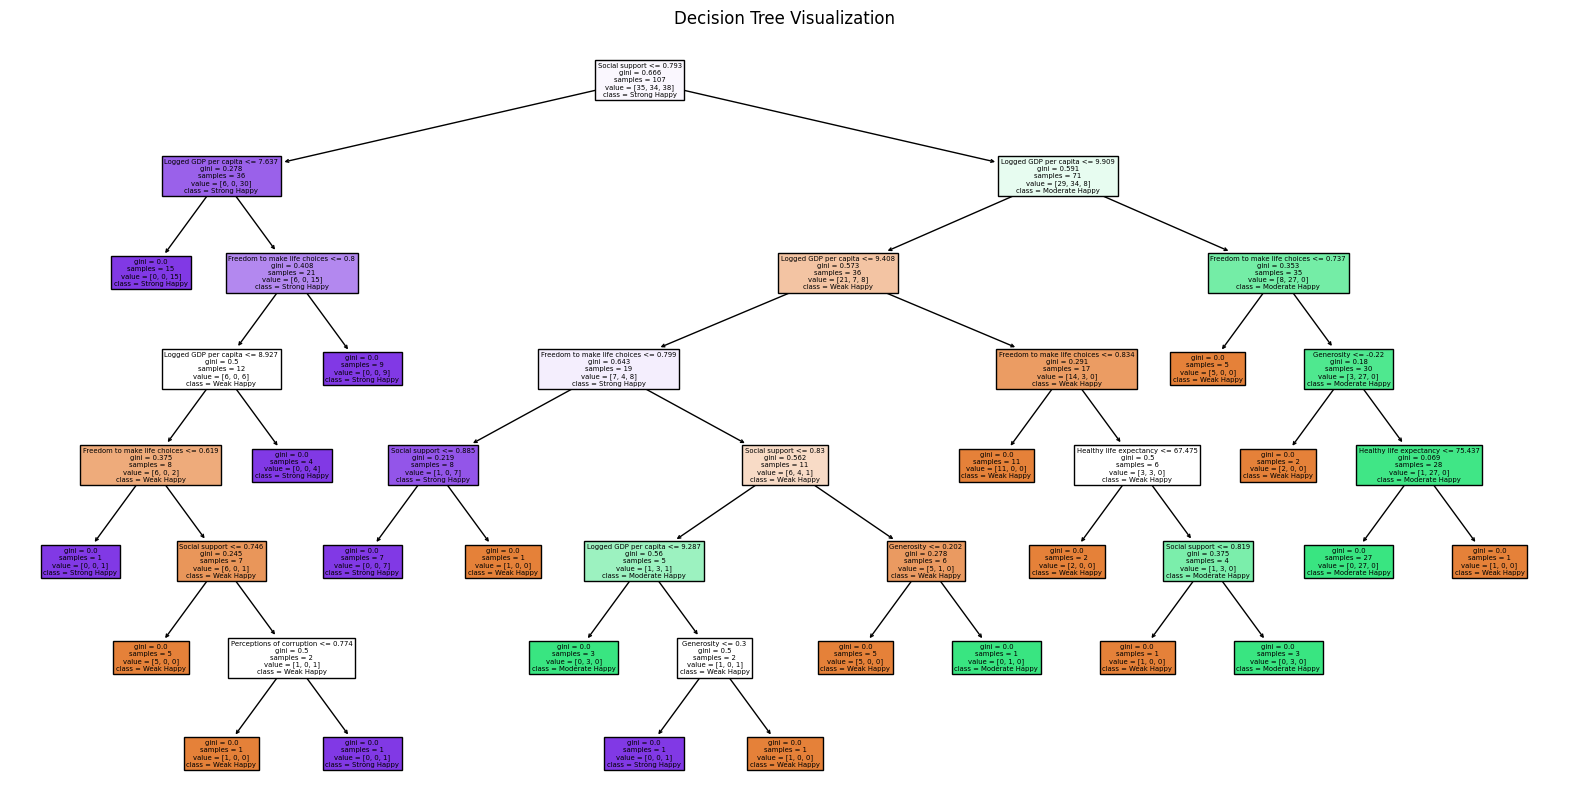

Correctly Classified Test Data Point Example:
Features: {'Logged GDP per capita': 8.225561142, 'Social support': 0.658048689, 'Healthy life expectancy': 49.50377274, 'Freedom to make life choices': 0.727909327, 'Generosity': -0.043991156, 'Perceptions of corruption': 0.790771961}
Actual Category: 0, Predicted Category: 0

Incorrectly Classified Test Data Point Example:
Features: {'Logged GDP per capita': 9.518632889, 'Social support': 0.91316092, 'Healthy life expectancy': 70.59999847, 'Freedom to make life choices': 0.853962779, 'Generosity': 0.038085498, 'Perceptions of corruption': 0.824211061}
Actual Category: 0, Predicted Category: 1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset (Assuming you've done this step)
df_2020 = pd.read_csv("/content/drive/MyDrive/projects/archive/2020.csv")

# Step 1: Categorize countries based on Ladder Score
df_2020['Happiness Category'] = pd.qcut(df_2020['Ladder score'], 3, labels=['Weak Happy', 'Moderate Happy', 'Strong Happy'])

# Step 2: Categorize relevant attributes
attributes = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
              'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for attribute in attributes:
    df_2020[f'{attribute} Category'] = pd.qcut(df_2020[attribute], 3, labels=['Low', 'Medium', 'High'])

# Prepare the data for modeling
X = df_2020[attributes]
y = df_2020['Happiness Category']
y_encoded = LabelEncoder().fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train the Decision Tree Model (repeating for context)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model (repeating for context)
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
print(report)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=attributes, class_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
plt.title("Decision Tree Visualization")
plt.show()

# Find a correctly classified test data point
correct_index = next(i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual == predicted)
print("Correctly Classified Test Data Point Example:")
print(f"Features: {X_test.iloc[correct_index].to_dict()}")
print(f"Actual Category: {y_test[correct_index]}, Predicted Category: {y_pred[correct_index]}")

# Find an incorrectly classified test data point
incorrect_index = next(i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted)
print("\nIncorrectly Classified Test Data Point Example:")
print(f"Features: {X_test.iloc[incorrect_index].to_dict()}")
print(f"Actual Category: {y_test[incorrect_index]}, Predicted Category: {y_pred[incorrect_index]}")

In [ ]:
# Load the dataset from CSV
df_2022 = pd.read_csv("/content/drive/MyDrive/projects/archive/2022.csv")

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(df_2022.info())
df_2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [ ]:
# Convert relevant columns to numeric
numeric_cols = ['Happiness score', 'Whisker-high', 'Whisker-low', 'Dystopia (1.83) + residual',
                'Explained by: GDP per capita', 'Explained by: Social support',
                'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                'Explained by: Generosity', 'Explained by: Perceptions of corruption']

for col in numeric_cols:
    df_2022[col] = pd.to_numeric(df_2022[col].str.replace(',', '.'), errors='coerce')


In [ ]:
# Drop rows with NaN values
df_2022.dropna(inplace=True)

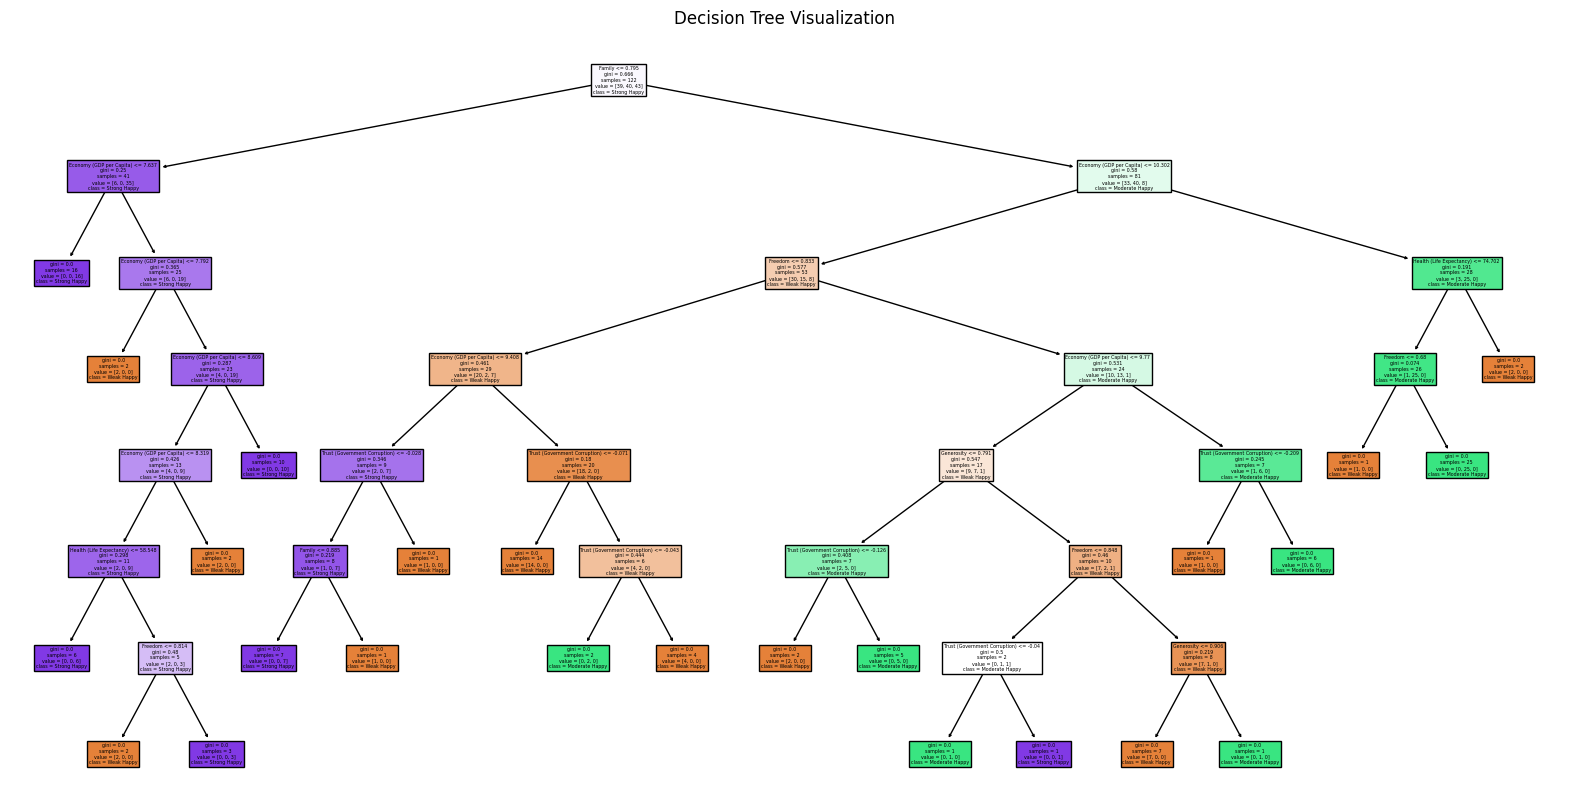

                precision    recall  f1-score   support

Moderate Happy       0.56      0.42      0.48        12
  Strong Happy       0.73      0.73      0.73        11
    Weak Happy       0.64      0.88      0.74         8

      accuracy                           0.65        31
     macro avg       0.64      0.67      0.65        31
  weighted avg       0.64      0.65      0.63        31

Correctly Classified Test Data Point Example:
Features: {'Logged GDP per capita': 9.518632889, 'Social support': 0.91316092, 'Healthy life expectancy': 70.59999847, 'Freedom to make life choices': 0.853962779, 'Generosity': 0.038085498, 'Perceptions of corruption': 0.824211061}
Actual Category: Moderate Happy, Predicted Category: Moderate Happy

Incorrectly Classified Test Data Point Example:
Features: {'Logged GDP per capita': 8.225561142, 'Social support': 0.658048689, 'Healthy life expectancy': 49.50377274, 'Freedom to make life choices': 0.727909327, 'Generosity': -0.043991156, 'Perceptions of 

In [ ]:
# Corrected variable name for happiness boundaries
happiness_boundaries = [df_2022['Happiness score'].quantile(q) for q in [1/3, 2/3]]
df_2022['Happiness Category'] = pd.cut(df_2022['Happiness score'], bins=[-float('inf')] + happiness_boundaries + [float('inf')],
                                       labels=['Weak Happy', 'Moderate Happy', 'Strong Happy'])

# Split data into train and test sets and train the decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualization of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Weak Happy', 'Moderate Happy', 'Strong Happy'])
plt.title("Decision Tree Visualization")
plt.show()

# Evaluation of the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Additional steps to identify and display correctly and incorrectly classified examples
correct_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual == predicted]
incorrect_indices = [i for i, (actual, predicted) in enumerate(zip(y_test, y_pred)) if actual != predicted]

# Display an example of correct classification
if correct_indices:
    correct_index = correct_indices[0]  # Taking the first correct example
    print("Correctly Classified Test Data Point Example:")
    print(f"Features: {X_test.iloc[correct_index].to_dict()}")
    print(f"Actual Category: {y_test.iloc[correct_index]}, Predicted Category: {y_pred[correct_index]}")

# Display an example of incorrect classification
if incorrect_indices:
    incorrect_index = incorrect_indices[0]  # Taking the first incorrect example
    print("\nIncorrectly Classified Test Data Point Example:")
    print(f"Features: {X_test.iloc[incorrect_index].to_dict()}")
    print(f"Actual Category: {y_test.iloc[incorrect_index]}, Predicted Category: {y_pred[incorrect_index]}")